**1. Bike Details Dataset**

**Import Library**

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**Import Dataset**

In [169]:
df = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/BIKE DETAILS.csv")

**Profile of data**

In [170]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [171]:
df.shape

(1061, 7)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [173]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

Questions

In [174]:
#1. What is the range of selling prices in the dataset?
maximum = df["selling_price"].max()
minimum = df["selling_price"].min()

print("The range of selling price in the dataset is between",minimum,"to",maximum)

The range of selling price in the dataset is between 5000 to 760000


In [175]:
#2. What is the median selling price for bikes in the dataset?
median = df["selling_price"].median()
print("Median of selling price for bikes in the dataset is",median)

Median of selling price for bikes in the dataset is 45000.0


In [176]:
#3. What is the most common seller type?
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [177]:
#Insights: The most common seller type is Individual

In [178]:
#4. How many bikes have driven more than 50,000 kilometers?
x = len(df[df["km_driven"] > 50000])
print(x,"bikes have driven more than 50,000 KM")

170 bikes have driven more than 50,000 KM


In [179]:
#5. What is the average km_driven value for each ownership type?
df.groupby(df["owner"])["km_driven"].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [180]:
#6. What proportion of bikes are from the year 2015 or older?
x = len(df[df["year"] <= 2015])
y = len(df)

prop = round((x/y)*100,2)

print("Proportion of bikes are from the year 2015 or older is:",prop)

Proportion of bikes are from the year 2015 or older is: 56.64


In [181]:
#7. What is the trend of missing values across the dataset?

#Only "ex_showroom_price" has missing values
x = df["ex_showroom_price"].isnull().sum()
y = round((x/len(df))*100,2)

print("Percentage of missing values in ex_showroom_price column is:",y)

Percentage of missing values in ex_showroom_price column is: 41.0


In [182]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
df[df["ex_showroom_price"] == df["ex_showroom_price"].max()][["name","ex_showroom_price"]]

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


In [183]:
#9. What is the total number of bikes listed by each seller type?
df.groupby(df["seller_type"]).count()["owner"]

seller_type
Dealer           6
Individual    1055
Name: owner, dtype: int64

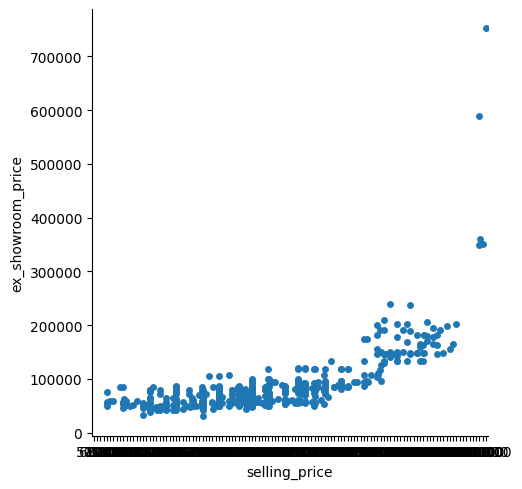

In [184]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
x = df[df["owner"] == "1st owner"]

sns.catplot(data=x,x=x["selling_price"],y=x["ex_showroom_price"])

In [185]:
#Insights: Positive relationship between them

<Axes: ylabel='km_driven'>

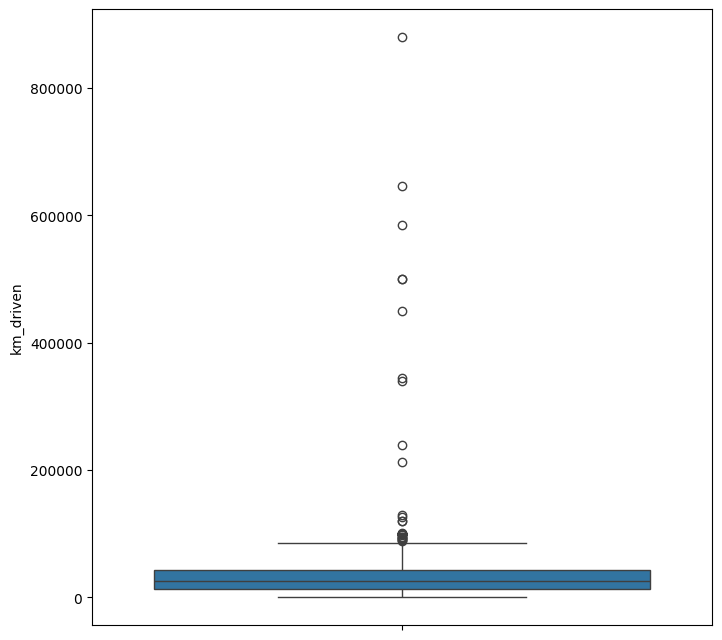

In [186]:
#11. Identify and remove outliers in the km_driven column using the IQR method?
plt.figure(figsize=(8,8))
sns.boxplot(data=df,y="km_driven")

In [187]:
#Now, remove outliers using IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR


df1 = df[(df["km_driven"] >= lower_fence) & (df["km_driven"] <= upper_fence)]

<Axes: ylabel='km_driven'>

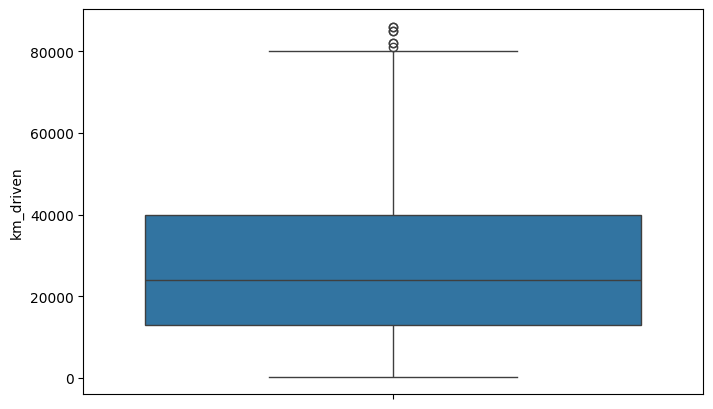

In [188]:
#Now check outliers after outliers treatment

plt.figure(figsize=(8,5))
sns.boxplot(data=df1,y="km_driven")

<Axes: xlabel='year', ylabel='selling_price'>

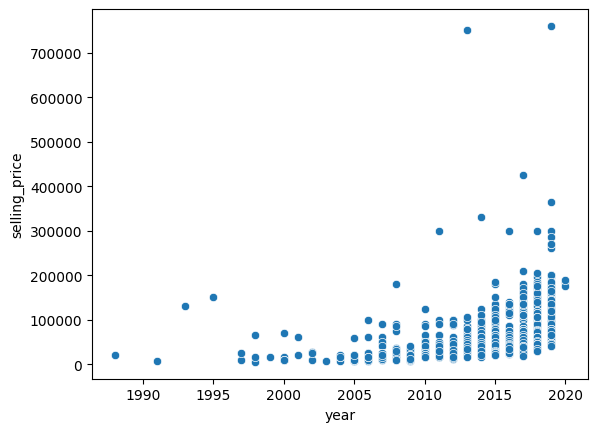

In [189]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price

sns.scatterplot(data=df,x="year",y="selling_price")

In [190]:
#Insights: Year increasing as well as selling_price increasing

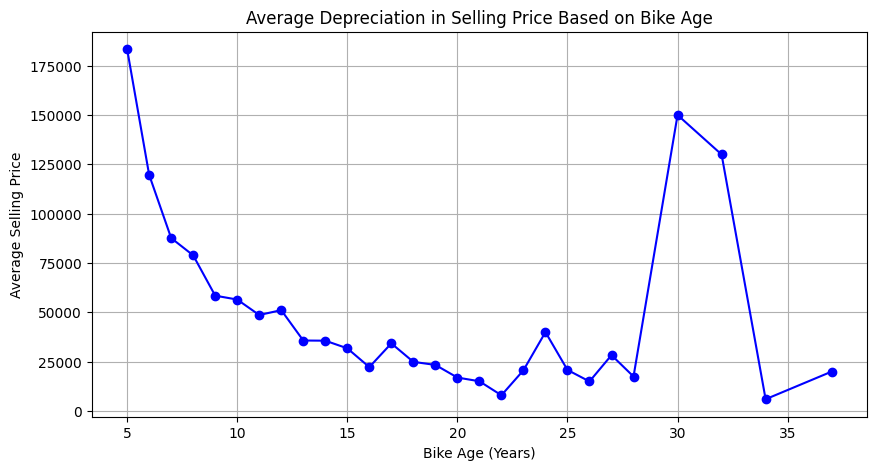

In [191]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025
df['bike_age'] = current_year - df["year"]


age_price_df = df.groupby('bike_age')['selling_price'].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(age_price_df['bike_age'], age_price_df['selling_price'], marker='o', linestyle='-', color='b')

plt.title("Average Depreciation in Selling Price Based on Bike Age")
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price")
plt.grid(True)
plt.show()


In [192]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'bike_age'],
      dtype='object')

<Axes: >

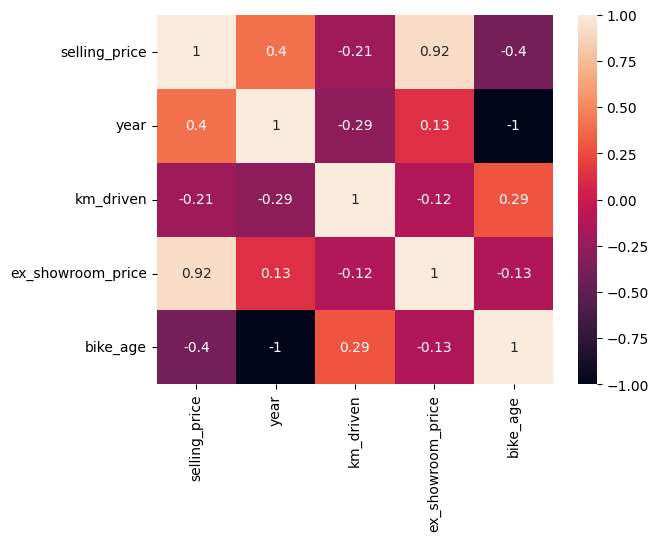

In [193]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

**2. Car Sale Dataset**

**Read dataset**

In [194]:
df2 = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/Car Sale.csv")

**Profile of data**

In [195]:
df2.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [196]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [197]:
df2.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [198]:
df2.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

**Questions**

In [199]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
df2.groupby(df2["Dealer_Name"])["Price ($)"].mean()

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [200]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
df2.groupby(df2["Company"])["Price ($)"].std().sort_values(ascending=False)[0:1]

Company
Lincoln    19658.050211
Name: Price ($), dtype: float64

In [201]:
df2[df2["Company"] == "Lincoln"].max()["Price ($)"]

82500

In [202]:
df2[df2["Company"] == "Lincoln"].min()["Price ($)"]

1700

In [203]:
#Insights: This company has maximum pricing cars and also have minimum pricing cars so, 
#this company has the highest variation in price

In [204]:
#3. What is the distribution of car prices for each transmission type, 
#and how do the interquartile ranges compare?

df2["Transmission"].unique()

array(['Auto', 'Manual'], dtype=object)

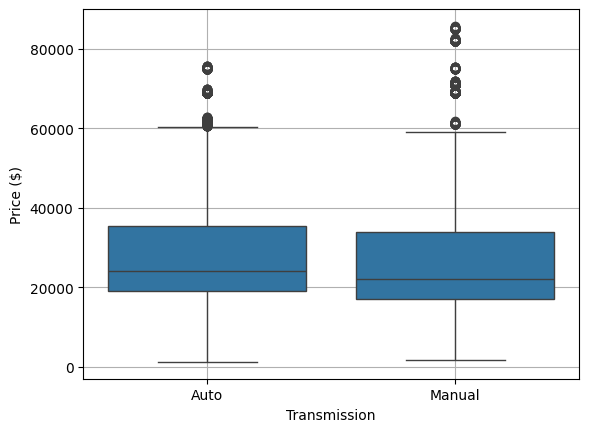

In [205]:
sns.boxplot(data=df2,x="Transmission",y="Price ($)")
plt.grid()

In [206]:
df2.groupby(df2["Transmission"])["Price ($)"].quantile(0.75) - df2.groupby(df2["Transmission"])["Price ($)"].quantile(0.25)

Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64

In [207]:
#Hence, IQR of Manual Transmission is higher than the Auto Transmission

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

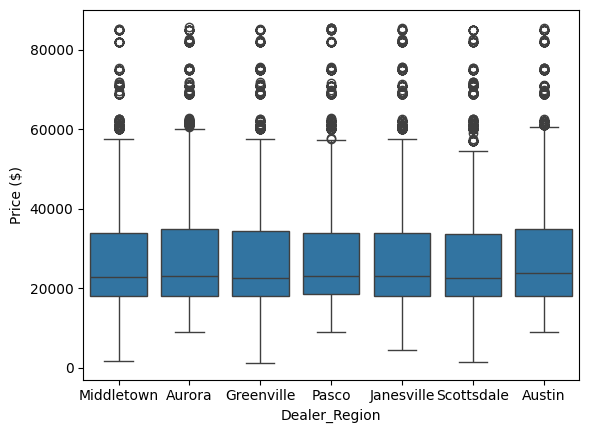

In [208]:
#4. What is the distribution of car prices across different regions?
sns.boxplot(data=df2,x="Dealer_Region",y="Price ($)")

In [209]:
#5. What is the distribution of cars based on body styles?
df2["Body Style"].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

<Axes: xlabel='Body Style', ylabel='Price ($)'>

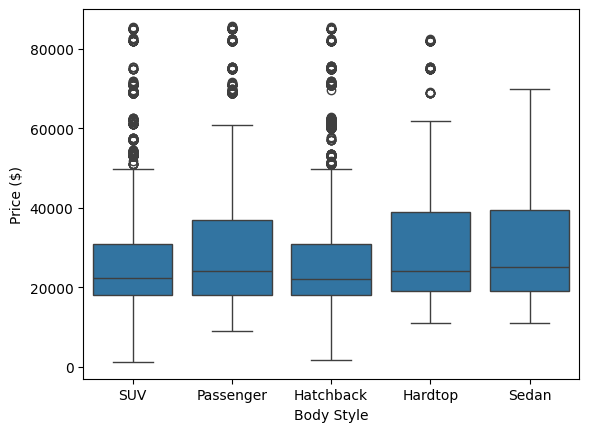

In [210]:
sns.boxplot(data=df2,x="Body Style",y="Price ($)")

In [211]:
#6. How does the average selling price of cars vary by customer gender and annual income?
df2.groupby(df2["Gender"])["Price ($)"].mean()

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

<Axes: xlabel='Gender'>

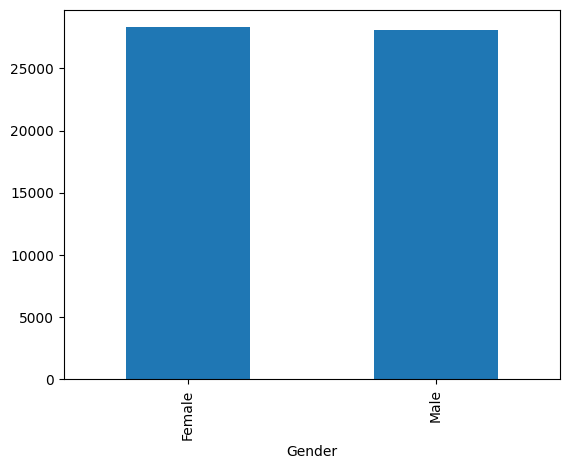

In [212]:
df2.groupby(df2["Gender"])["Price ($)"].mean().plot.bar()

In [213]:
#Insights: average selling price of cars is little vary by customer gender.

In [214]:
#7. What is the distribution of car prices by region, and how does the number of cars sold 
# vary by region?

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

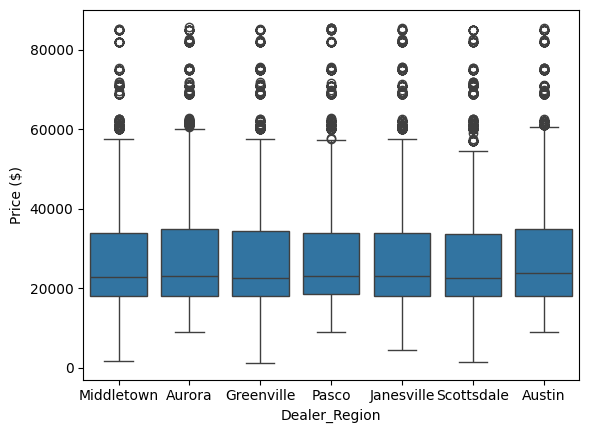

In [215]:
sns.boxplot(data=df2,x="Dealer_Region",y="Price ($)")

<Axes: xlabel='Dealer_Region'>

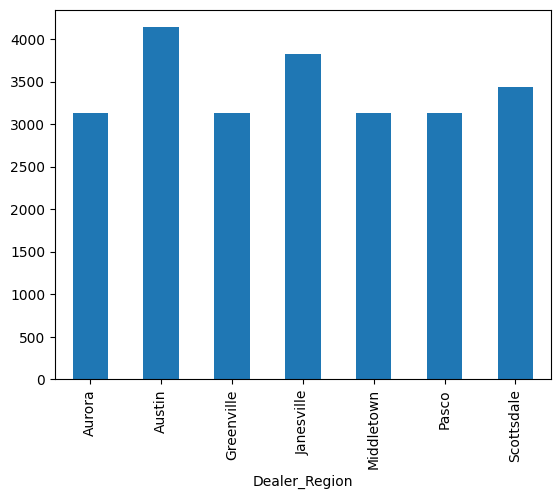

In [216]:
df2.groupby(df2["Dealer_Region"])["Car_id"].count().plot.bar()

In [217]:
#Insights: Maximum cars was sold in Austin area

In [218]:
#8. How does the average car price differ between cars with different engine sizes?
df2.groupby(df2["Engine"])["Price ($)"].mean()


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

<Axes: xlabel='Engine'>

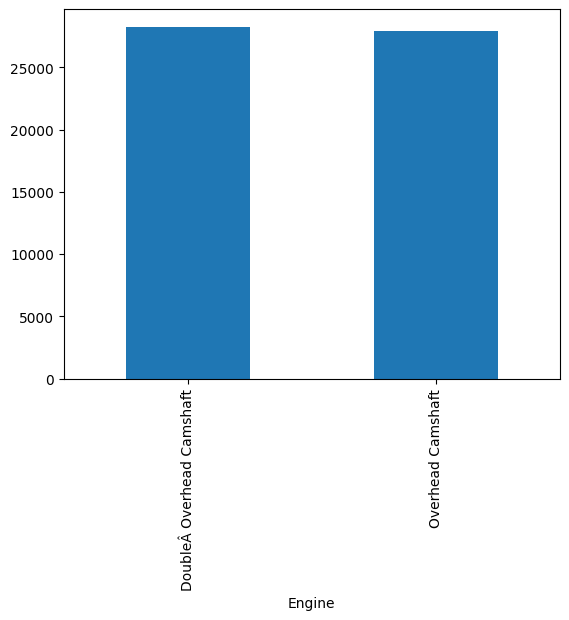

In [219]:
df2.groupby(df2["Engine"])["Price ($)"].mean().plot.bar()

In [220]:
#Insights: Almost same avg car price of each engine

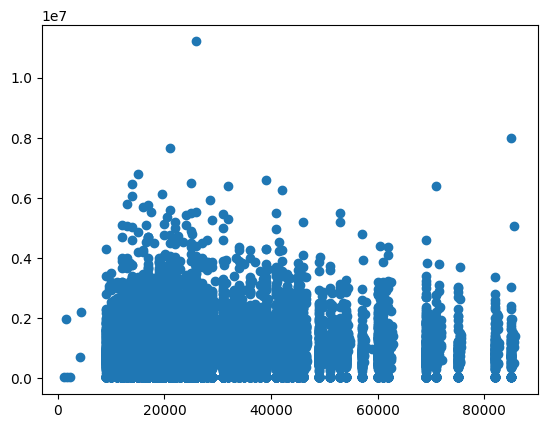

In [221]:
#9. How do car prices vary based on the customer’s annual income bracket?

plt.scatter(y=df2["Annual Income"],x=df2["Price ($)"])

In [222]:
#10.  What are the top 5 car models with the highest number of 
#sales, and how does their price distribution look?

In [223]:
top_models = df2.groupby('Model').size().reset_index(name='Total_Sales')
top_models = top_models.sort_values(by='Total_Sales', ascending=False).head(5)
top_models

,Model,Total_Sales
51,Diamante,418
137,Silhouette,411
109,Prizm,411
106,Passat,391
115,Ram Pickup,383


In [224]:
top_models = df2.groupby('Model').size().reset_index(name='Total_Sales')
top_models = top_models.sort_values(by='Total_Sales', ascending=False).head(5)
top_5_models = top_models['Model'].tolist()

<Axes: xlabel='Model', ylabel='Price ($)'>

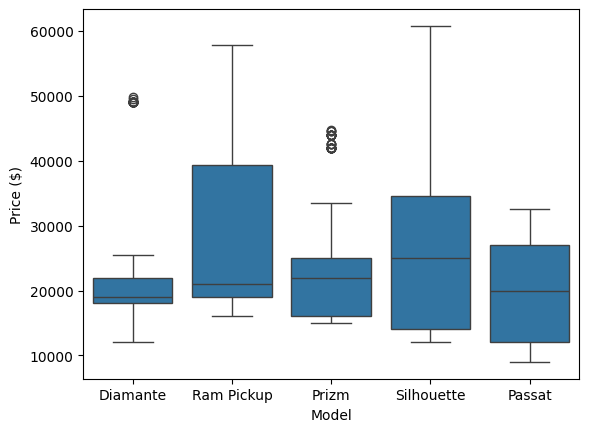

In [225]:
filter_data = df2[df2["Model"].isin(top_5_models)]
sns.boxplot(data=filter_data,x="Model",y="Price ($)")

**3. Amazon Sale Dataset**

**Read Data set**

In [226]:
df3 = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/amazon.csv")

**Profile data**

In [227]:
df3.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [228]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [229]:
df3.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [230]:
df3.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

****Data preparation****

In [231]:
#Product link and img_link are unnecessary columns so we can drop this column
df3.drop(["img_link","product_link"],axis=1,inplace=True)

In [232]:
#Unique vales of all columns
for i in df3.columns:
    print("Unique values of",i,"are",df3[i].unique())
    print("----------------------------------------")
    print()

Unique values of product_id are ['B07JW9H4J1' 'B098NS6PVG' 'B096MSW6CT' ... 'B009P2LIL4' 'B00J5DYCCA'
 'B01486F4G6']
----------------------------------------

Unique values of product_name are ['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)'
 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices'
 ...
 'Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)'
 'Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)'
 'Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)']
----------------------------------------

Unique values of category are ['Computers&Accessories|Access

In [233]:
#Convert dtype of discount_price (obj to numerical(float))
df3["discounted_price"].unique()


array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [234]:
df3["discounted_price"] = df3["discounted_price"].str.replace("₹","")
df3["discounted_price"] = df3["discounted_price"].str.replace(",","")

In [235]:
df3["discounted_price"].unique()

array(['399', '199', '329', '154', '149', '176.63', '229', '499', '299',
       '219', '350', '159', '349', '13999', '249', '13490', '970', '279',
       '59', '11499', '14999', '179', '389', '599', '99', '899', '32999',
       '209', '19999', '999', '333', '507', '309', '1199', '799', '6999',
       '230', '649', '15999', '348', '32990', '139', '263', '7999',
       '1599', '26999', '115', '10901', '1434', '7299', '325', '29999',
       '27999', '30990', '269', '24999', '18990', '290', '345', '1099',
       '719', '849', '21999', '449', '37999', '7390', '273.10', '15990',
       '210', '1299', '347', '228', '1499', '8499', '20990', '9999',
       '489', '23999', '689', '1699', '655', '749', '195', '416', '368',
       '29990', '339', '15490', '9490', '637', '1089', '12499', '1399',
       '88', '57.89', '205', '949', '379', '8990', '486', '5699', '709',
       '47990', '320', '129', '225', '547', '259', '239', '467', '11990',
       '252', '204', '6490', '235', '42999', '173', '848.99

In [236]:
#now convert to numeric
df3["discounted_price"] = df3["discounted_price"].astype("float")

In [237]:
df3["actual_price"]

0       ₹1,099
1         ₹349
2       ₹1,899
3         ₹699
4         ₹399
         ...  
1460      ₹919
1461    ₹3,045
1462    ₹3,080
1463    ₹1,890
1464    ₹3,690
Name: actual_price, Length: 1465, dtype: object

In [238]:
#Convert actual_price values object to numeric
df3["actual_price"].unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

In [239]:
df3["actual_price"] = df3["actual_price"].str.replace("₹","")
df3["actual_price"] = df3["actual_price"].str.replace(",","")

In [240]:
df3["actual_price"] = df3["actual_price"].astype("float")

In [241]:
df3["actual_price"].unique()

array([1.09900e+03, 3.49000e+02, 1.89900e+03, 6.99000e+02, 3.99000e+02,
       1.00000e+03, 4.99000e+02, 2.99000e+02, 9.99000e+02, 3.39000e+02,
       7.99000e+02, 7.00000e+02, 8.99000e+02, 2.49990e+04, 2.19900e+04,
       1.79900e+03, 2.29000e+04, 1.99000e+02, 1.99900e+04, 1.99990e+04,
       1.99900e+03, 7.50000e+02, 5.99000e+02, 6.66660e+02, 1.90000e+03,
       4.59990e+04, 6.95000e+02, 3.49990e+04, 1.59900e+03, 1.20800e+03,
       4.75000e+02, 3.95000e+02, 2.19900e+03, 5.00000e+02, 2.10000e+03,
       1.29990e+04, 1.39900e+03, 2.19990e+04, 1.49900e+03, 4.79000e+04,
       8.45000e+02, 1.40000e+03, 1.49900e+04, 2.99900e+03, 4.29990e+04,
       3.09900e+04, 3.99900e+03, 2.49000e+02, 1.91250e+04, 1.29900e+03,
       3.99990e+04, 4.09900e+04, 5.29000e+04, 8.00000e+02, 3.19990e+04,
       1.80900e+03, 2.99990e+04, 6.50000e+04, 2.00000e+04, 2.39900e+04,
       1.59990e+04, 4.49900e+04, 4.49990e+04, 1.70000e+03, 5.95000e+02,
       2.79900e+04, 1.20000e+03, 3.49900e+04, 1.50000e+03, 4.999

In [242]:
#Convert discount_percentage values object to numeric
df3["discount_percentage"] = pd.to_numeric(df3["discounted_price"],errors="coerce")
df3["discount_percentage"].dtype

dtype('float64')

In [243]:
#Convert dtype of rating (obj to numerical(float))
df3["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [244]:
df3["rating"] = pd.to_numeric(df3["rating"],errors="coerce")
df3.rating.dtype

dtype('float64')

In [245]:
#Convert dtype of rating_count (obj to numerical(float))
df3["rating_count"] = df3["rating_count"].str.replace(",","")

In [246]:
df3["rating_count"] = df3["rating_count"].astype("float")

In [247]:
df3["rating_count"].unique()

array([24269., 43994.,  7928., ...,   468.,  8031.,  6987.])

In [248]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
dtype: object

In [249]:
df3.sample(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
243,B09L835C3V,"Smashtronics® - Case for Firetv Remote, Fire S...","Electronics|HomeTheater,TV&Video|Accessories|R...",199.0,399.0,199.0,4.2,1335.0,【100% Fits】Specially designed for Fire TV Stic...,"AHGRRV5SETS34URXKM5JR365ZGKA,AFLOF6ZEMEH5APN3L...","Princey,Subodh Gupta,Amazon Customer,Ram Sarik...","RCI40FPILZN2J,R33GJM990WL2D,R2IZDWTSBD3OJD,R18...","Cover is Little loose for Fire remote cover,I ...","All is good except little loose cover,I ordere..."
1069,B07GMFY9QM,SOFLIN Egg Boiler Electric Automatic Off 7 Egg...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,379.0,999.0,379.0,4.3,3096.0,PERFECT EGGS EVERY TIME: Cooking eggs to your ...,"AF2FWVZPG6WMO4ERTECABX7BLUGQ,AFHFTUD3BM25DHFHS...","Sivakrishna,Anish kanneboina,Amazon Customer,s...","RA7Q9QDG5JCPA,R22K8FW0YEB5RU,R2BVDAB2VQXQ5K,R9...","Egg boiler,Time efficient..easy to use,Good to...","Hi, The product is working good. And taking on..."
815,B094QZLJQ6,Seagate One Touch 2TB External HDD with Passwo...,Computers&Accessories|ExternalDevices&DataStor...,5799.0,7999.0,5799.0,4.5,50273.0,Digital Storage Capacity - 2TB; Safely and eas...,"AG7XDPNSDQFE7CPVN7ODSPVOAD4Q,AF54QC7SIVQCZ4D2K...","Amazon Customer,Jayesh B.,Sunil,Kaling246,bisw...","R2X0Z7BS12ZYFD,R1CZP476IRR94Y,RF43347JSIPWZ,R2...","sometimes writes are little slow, otherwise fi...","sometimes writes are little slow, otherwise fi..."


**Questions**

In [250]:
#1. What is the average rating for each product category?
df3.groupby(df3["category"])["rating"].mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [251]:
#2. What are the top rating_count products by category?(top 5)

In [252]:
df3.groupby(df3["category"])[["product_name","rating_count"]].max().sort_values(by="rating_count",ascending=False)[0:5]


,product_name,rating_count
category,,
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",tizum HDMI to VGA Adapter Cable 1080P for Proj...,426973.0
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",realme Buds Wireless in Ear Bluetooth Earphone...,363713.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",313836.0
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,"SanDisk Ultra Flair 64GB USB 3.0 Pen Drive, Mu...",253105.0


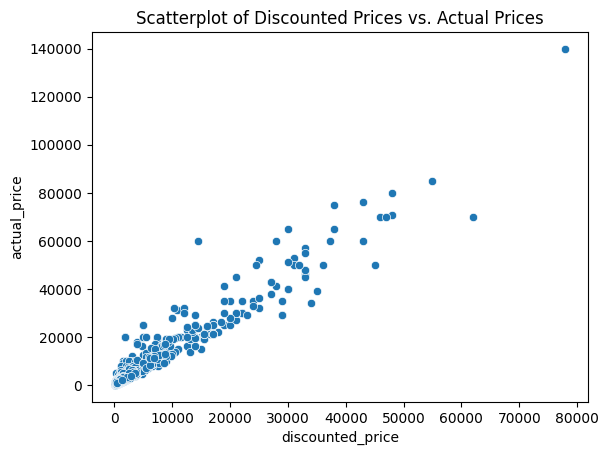

In [253]:
#Q.3 what is the distribution of discounted prices vs. actual prices?
sns.scatterplot(data=df3, x="discounted_price", y="actual_price")
plt.title("Scatterplot of Discounted Prices vs. Actual Prices")
plt.show()



In [254]:
#4. How does the average discount percentage vary across categories?

In [255]:
df3.groupby(df3["category"])["discount_percentage"].mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    2339.000000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    221.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            649.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                         574.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            749.000000
                                                                                                                             ...     
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         150.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|P

In [256]:
#5. What are the most popular product names?
#Products with a 4.5 to 5 star rating are generally considered popular
df3[(df3["rating"] <= 5) & (df3["rating"] >= 4.5)]["product_name"]

20      Duracell USB Lightning Apple Certified (Mfi) B...
30      AmazonBasics USB 2.0 - A-Male to A-Female Exte...
40      AmazonBasics USB 2.0 Cable - A-Male to B-Male ...
70      oraimo 65W Type C to C Fast Charging Cable USB...
88      Lapster 65W compatible for OnePlus Dash Warp C...
                              ...                        
1399    Cafe JEI French Press Coffee and Tea Maker 600...
1410    Sujata Supermix, Mixer Grinder, 900 Watts, 3 J...
1416    Aqua d pure Active Copper 12-L RO+UV Water Fil...
1428    Sujata Dynamix, Mixer Grinder, 900 Watts, 3 Ja...
1438    INALSA Air Fryer Digital 4L Nutri Fry - 1400W ...
Name: product_name, Length: 104, dtype: object

In [257]:
#6. What are the most popular product keywords?


In [258]:
#7. What are the most popular product reviews?
df3[(df3["rating"] == 5)]["product_name"]

174    Syncwire LTG to USB Cable for Fast Charging Co...
324    REDTECH USB-C to Lightning Cable 3.3FT, [Apple...
775    Amazon Basics Wireless Mouse | 2.4 GHz Connect...
Name: product_name, dtype: object

In [259]:
#8. What is the correlation between discounted_price and rating?
correlation = df3["discounted_price"].corr(df3["rating"])
correlation

0.12033741712288534

In [260]:
#9. What are the Top 5 categories based on the highest rating?
df3.groupby(df3["category"])["rating"].max().sort_values(ascending=False)[0:5]

category
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice        5.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables     5.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders               4.8
Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters      4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers    4.8
Name: rating, dtype: float64

In [261]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.


**4. Spotify Dataset**

**Read dataset**

In [262]:
df4 = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/spotify.csv")

**Profile of dataset**

In [263]:
df4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [264]:
df4.shape

(440, 5)

In [265]:
df4.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

In [266]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


****Data preparation****

In [267]:
#Change ms to s
#1 ms = 0.001

def time(ms):
    return round(ms*0.001,3)

In [268]:
#test function
time(319191)

319.191

In [269]:
#Now apply
df4["Duration (ms)"] = df4["Duration (ms)"].apply(time)

In [270]:
df4["Duration (ms)"]

0      319.191
1      173.986
2      260.111
3      247.444
4      218.364
        ...   
435    221.863
436    191.900
437    283.693
438    220.408
439    267.720
Name: Duration (ms), Length: 440, dtype: float64

In [271]:
#Now change the column name
df4 = df4.rename(columns={"Duration (ms)":"Duration(s)"})

In [272]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration(s)', 'Track ID'], dtype='object')

**Questions**

In [273]:
#1. Read the dataframe, check null value if present then do the needful, 
# check duplicate row , if present then do the needful

In [274]:
df4.isnull().sum()

Artist         0
Track Name     0
Popularity     0
Duration(s)    0
Track ID       0
dtype: int64

In [275]:
#No null values present in the dataset

In [276]:
df4.duplicated().sum()

27

In [277]:
#27 entries are duplicate, we should to drop these duplicate values

In [278]:
df4 = df4.drop_duplicates()

In [279]:
df4.duplicated().sum()

0

In [280]:
#Now need to reset the index
df4.reset_index()

,index,Artist,Track Name,Popularity,Duration(s),Track ID
0,0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319.191,1yeB8MUNeLo9Ek1UEpsyz6
1,1,Drake,One Dance,91,173.986,1zi7xx7UVEFkmKfv06H8x0
2,2,Drake,IDGAF (feat. Yeat),90,260.111,2YSzYUF3jWqb9YP9VXmpjE
3,3,Drake,First Person Shooter (feat. J. Cole),88,247.444,7aqfrAY2p9BUSiupwk3svU
4,4,Drake,Jimmy Cooks (feat. 21 Savage),88,218.364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...,...
408,433,French Montana,Stand United,54,163.971,01CHrTerCzyRpMI1MzQ4fz
409,434,Jason Derulo,Tip Toe (feat. French Montana),65,187.521,0TY3jVGwGDwDabLyQLVRQQ
410,436,Fat Joe,All The Way Up (feat. Infared),64,191.900,7Ezwtgfw7khBrpvaNPtMoT
411,437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283.693,7xVLFuuYdAvcTfcP3IG3dS


<Axes: xlabel='Popularity', ylabel='Count'>

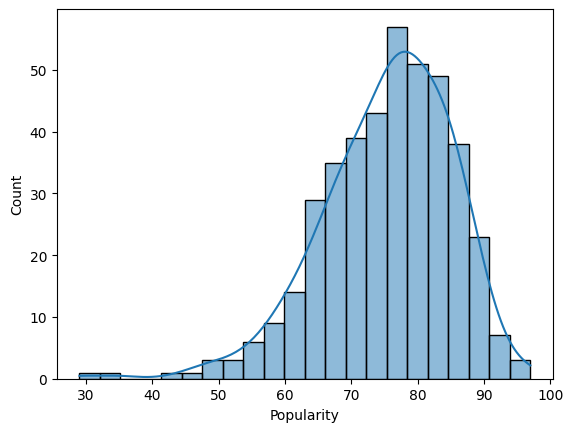

In [281]:
#2. What is the distribution of popularity among the tracks in the dataset?
# Visualize it using a histogram
sns.histplot(data=df4,x="Popularity",kde=True)

In [282]:
#3. Is there any relationship between the popularity and the duration of tracks? 
# Explore this using a scatter plot

<Axes: xlabel='Popularity', ylabel='Duration(s)'>

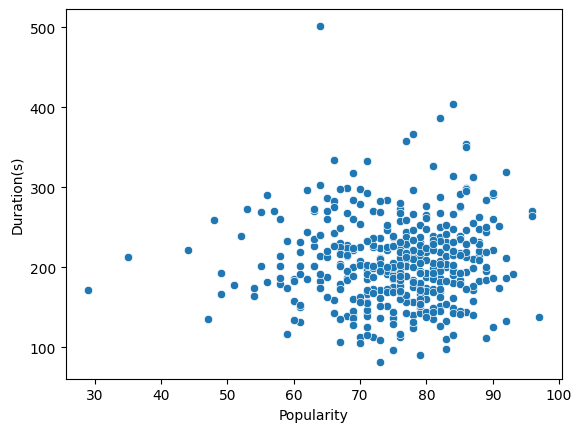

In [283]:
sns.scatterplot(data=df4,x="Popularity",y="Duration(s)")

In [284]:
df4.corr(numeric_only=True)

,Popularity,Duration(s)
Popularity,1.000000,0.038992
Duration(s),0.038992,1.000000


In [285]:
#The value of corr b/w Popularity and duration(s) 0.03 
#So is there no relationship between them

In [286]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot

In [287]:
df4["Artist"].value_counts()

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

In [288]:
#Sir Drake has the highest number of tracks in the dataset.

<Axes: xlabel='Artist'>

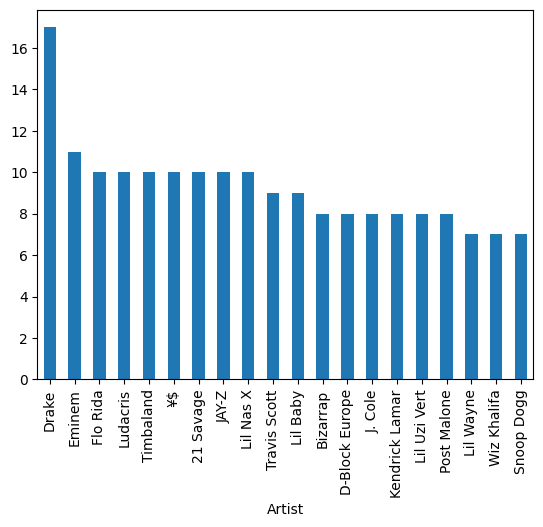

In [289]:
df4["Artist"].value_counts()[0:20].plot.bar()

In [290]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
df4[["Popularity","Track Name","Artist"]].sort_values(by="Popularity",ascending=True)[0:5]

,Popularity,Track Name,Artist
207,29,Attachments (feat. Coi Leray),Pressa
231,35,Intentions,Justin Bieber
413,44,Splash Brothers,French Montana
225,47,On Me - Remix,Lil Baby
407,48,911 (feat. Mary J. Blige),Wyclef Jean


In [291]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration(s)', 'Track ID'], dtype='object')

In [292]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? 
# Calculate and display the average popularity for each artis
df4.groupby(df4["Artist"])["Popularity"].mean().sort_values(ascending=False)[0:1]

Artist
cassö    92.0
Name: Popularity, dtype: float64

<Axes: xlabel='Artist'>

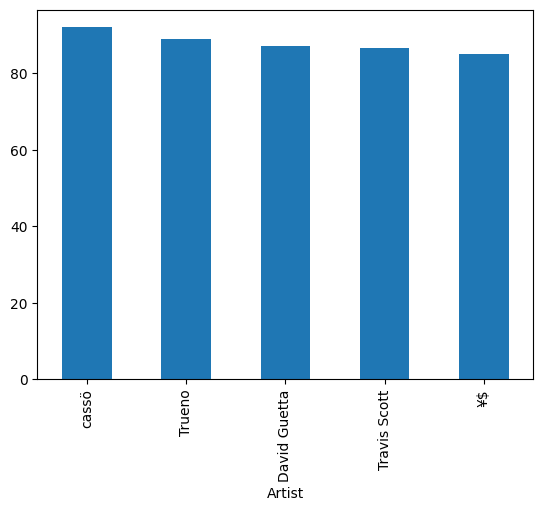

In [293]:
df4.groupby(df4["Artist"])["Popularity"].mean().sort_values(ascending=False)[0:5].plot.bar()

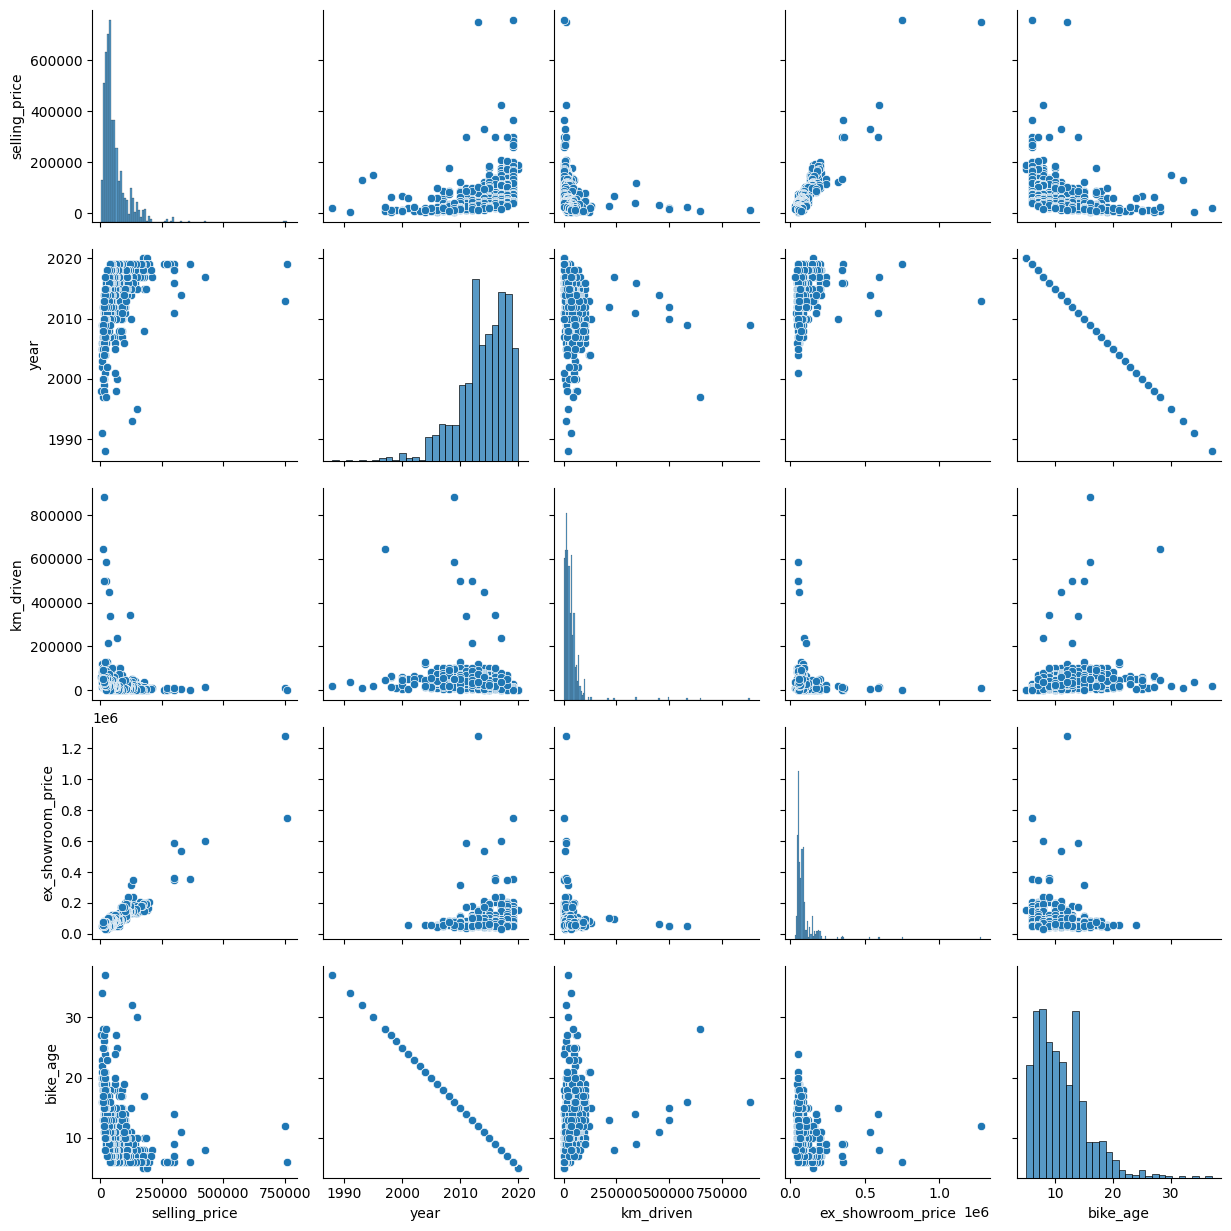

In [294]:
#8. Visualize relationships between multiple numerical variables simultaneously 
# using a pair plot
sns.pairplot(data=df,kind="scatter")


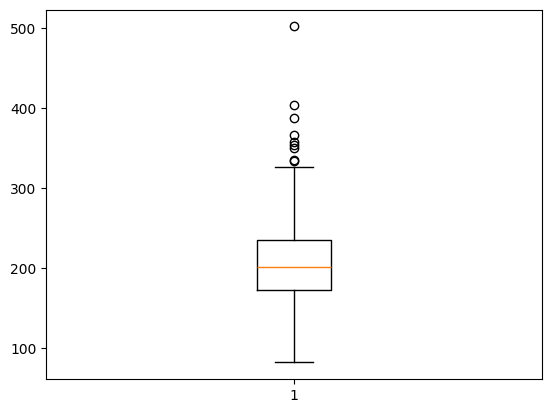

In [295]:
#9. Does the duration of tracks vary significantly across different artists? 
# Explore this visually using a box plot or violin plot
plt.boxplot(x=df4["Duration(s)"])
plt.show()

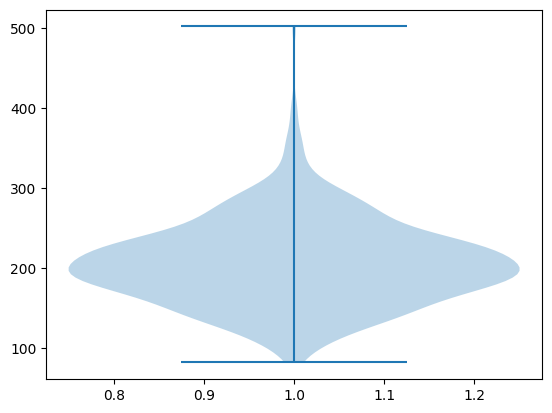

In [296]:
plt.violinplot(df4["Duration(s)"])
plt.show()

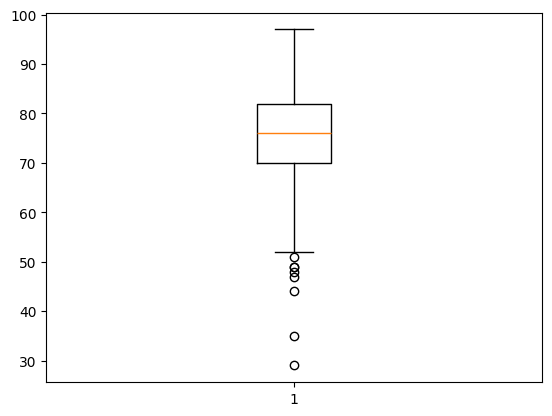

In [297]:
#10. How does the distribution of track popularity vary for different artists? 
# Visualize this using a swarm plot or a violin plot.
plt.boxplot(x=df4["Popularity"])
plt.show()